# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [4]:
# Import the appropriate libraries with aliases

# Create two new dataframes
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
north_df.head()
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
#Code Used:

north_df['Rep ID'].str.lower().unique().size


9

#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
#Code Used:
south_df['Rep ID'].str.lower().unique().size

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [11]:
#Code Used:
df_northbusy = north_df["Busy Minutes"].mean()
df_northnotready = north_df["Not Ready Minutes"].mean()
df_northincoming = north_df["Incoming Wait Time"].mean()
df_north_duringcall = north_df["During Call Wait Time"].mean()
print ("Busy Minutes Mean ", (df_northbusy))
print ("Not Ready ", (df_northnotready))
print ("Incoming Wait Time ", (df_northincoming))
print ("During Call Wait Time ", (df_north_duringcall))

Busy Minutes Mean  9.987755102040817
Not Ready  1.9142857142857144
Incoming Wait Time  3.048780487804878
During Call Wait Time  2.9673469387755103


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [7]:
#Code Used:
df_southbusy = south_df["Busy Minutes"].mean()
df_southnotready = south_df["Not Ready Minutes"].mean()
df_southincoming = south_df["Incoming Wait Time"].mean()
df_south_duringcall = south_df["During Call Wait Time"].mean()
print ("Busy Minutes Mean ", (df_southbusy))
print ("Not Ready ", (df_southnotready))
print ("Incoming Wait Time ", (df_southincoming))
print ("During Call Wait Time ", (df_south_duringcall))

Busy Minutes Mean  10.054140127388536
Not Ready  1.910828025477707
Incoming Wait Time  3.0
During Call Wait Time  3.0764331210191083


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [15]:
# Code Used:
import pandas as pd
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
# only keep Calls and Time Block columns
# Merge two datasets
# Convert Calls to int
# Sum of Calls per Time Block
df_northccb = north_df[['Calls', 'Time Block']]
df_southccb = south_df[['Calls', 'Time Block']]
concat_nsdf = pd.concat([df_northccb,df_southccb])
concat_nsdf['Calls'].astype('int')
sumccb = concat_nsdf.groupby('Time Block')['Calls'].agg(['sum','count'])
sumccb


,sum,count
Time Block,,
10:00 AM,99,99
11:00 AM,56,56
12:00 PM,120,120
1:00 PM,40,40
2:00 PM,65,65
3:00 PM,73,73
4:00 PM,53,53
5:00 PM,43,43
9:00 AM,10,10


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes =1.91 
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.07
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99 
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43




<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: The first step is to check for null data. 
NullCheck=df.isnull().sum()
print(NullCheck)

In [6]:
# Code Used
# Add Additional Cells as needed.
import pandas as pd
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
df = pd.concat([north_df,south_df])
df['Calls'].astype('int')
df.info()
# because of the corralation between outgoing and Incoming wait we do not want to remove


<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             559 non-null    int64  
 1   Branch                 559 non-null    object 
 2   Call Purpose           559 non-null    object 
 3   Time Block             559 non-null    object 
 4   Incoming or Outgoing   559 non-null    object 
 5   Queue                  559 non-null    object 
 6   Rep ID                 559 non-null    object 
 7   Sale                   559 non-null    object 
 8   Lost Call              559 non-null    int64  
 9   Abandoned              559 non-null    int64  
 10  Busy Minutes           559 non-null    int64  
 11  Not Ready Minutes      559 non-null    int64  
 12  Incoming Wait Time     208 non-null    float64
 13  During Call Wait Time  559 non-null    int64  
 14  Calls                  559 non-null    int64  
dtypes: flo

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: We can use the value_counts to view the unique answers. The difference in the YES is the extra space after yes. We could use the strip method to remove spaces.


In [12]:
#Code Used
# Add Additional Cells as needed.
north_df['Sale'].value_counts(sort=True)
north_df['Sale'].unique()
north_df['Sale'] = north_df['Sale'].str.strip()


south_df['Sale'].value_counts(sort=True)
south_df['Sale'].unique()
south_df['Sale'] = south_df['Sale'].str.strip()



#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: duplicates could be found and removed using the drop duplicates code. 

In [11]:
#Code Used
# Add Additional Cells as needed.
import pandas as pd
north_df = pd.read_csv("NorthCallCenter.csv")
north_dup = north_df[north_df.duplicated()]
north_dup.head(5)
print (north_dup)

south_df = pd.read_csv("SouthCallCenter.csv")
south_dup = south_df[south_df.duplicated()]
south_dup.head(5)

north_dfcleaned= north_df.drop_duplicates()
north_dfcleaned.head(10)


Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls]
Index: []


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer:The First column that gives row count is pointless data and can be dropped but will need a name added to drop the column. 

In [13]:
#Code Used
# Add Additional Cells as needed.
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
concat_nsdf = pd.concat([north_df,south_df])
rename= concat_nsdf.rename(columns={"":"count_field"})
rename.drop([count_field], axis=1)

NameError: name 'count_field' is not defined

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [22]:
# Create dataframe for the entire company named df
import pandas as pd
import numpy as np
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

df = [north_df, south_df]
  
nsdf = pd.concat(df)

nsdf.head(10)


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37
- South Branch = Eric 35


In [35]:
# Code Used
# Groupby Rep ID, sort of most calls
import pandas as pd
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
df_northcbr = north_df[['Calls','Rep ID']]
df_southcbr = south_df[['Calls','Rep ID']]
df_northtoprep = df_northcbr.groupby('Rep ID')['Calls'].agg(['sum'])
df_nstop = df_northtoprep.sort_values(by = ['sum'], ascending=[True])
df_nstop.head(50)

df_southtoprep = df_southcbr.groupby('Rep ID')['Calls'].agg(['sum'])
df_sstop = df_southtoprep.sort_values(by = ['sum'], ascending=[True])
df_sstop.head(50)

,sum
Rep ID,
Alice,20
Sharon,25
Josh,26
Susan,26
Karl,28
George,29
Kate,29
Helga,31
Sandy,32


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.9%
- South Branch = 1.3%
- Company Wide = 2%
- Do any of these fall out of the optimal range of 2-5%? no

In [86]:
# Code Used
# Add Additional Cells as needed.
import pandas as pd
import numpy as np
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
df = [north_df, south_df]
nsdf = pd.concat(df)

ndf = north_df["Abandoned"].mean()*100
print(ndf)

sdf = south_df["Abandoned"].mean()*100
print(sdf)

nsdfaban = nsdf["Abandoned"].mean()*100
print(nsdfaban)


2.857142857142857
1.2738853503184715
1.9677996422182469


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%
- South Branch = 38.09%
- Company Wide = 38.94%

In [98]:
# Code Used
# Add Additional Cells as needed.
#display count of wait time
#wait time under two seconds
#divide under by count 
import pandas as pd
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
df_northwait = north_df[['Incoming Wait Time']]
df_southwait = south_df[['Incoming Wait Time']]
sumnorthwait = df_northwait.count()
#sumnorthwait 82
sumsouthwait = df_southwait.count()
#sumsouthwait 126

dfnorthtwo=df_northwait.where(df_northwait <= 2).count()
#dfnorthtwo 
dfsouthtwo=df_southwait.where(df_southwait <= 2).count()
#dfsouthtwo 76

northwaitfinal=dfnorthtwo/sumnorthwait
print(northwaitfinal)


southwaitfinal=(dfsouthtwo/sumsouthwait)
print(southwaitfinal)


#total company
totalwait=sumnorthwait+sumsouthwait
total2wait=dfnorthtwo+dfsouthtwo
total=(total2wait/totalwait)
print(total)

Incoming Wait Time    0.402439
dtype: float64
Incoming Wait Time    0.380952
dtype: float64
Incoming Wait Time    0.389423
dtype: float64


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3
- Company Wide in seconds = 3.02


In [62]:
# Code Used 
import pandas as pd
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
df_northwait = north_df[['Incoming Wait Time']]
df_southwait = south_df[['Incoming Wait Time']]
sumnorthwait = df_northwait.count()
#sumnorthwait 82
sumsouthwait = df_southwait.count()
#sumsouthwait 126

dfnorthsum=df_northwait.sum()
#dfnorthtwo 250
dfsouthsum=df_southwait.sum()
#dfsouthtwo 378

northwaitfinal=dfnorthsum/sumnorthwait
#northwaitfinal
#North Branch = 3.05

southwaitfinal=dfsouthsum/sumsouthwait
#southwaitfinal 
#South Branch = 3

#total company
totalwait=sumnorthwait+sumsouthwait
totalsumwait=dfnorthsum+dfsouthsum
total=totalsumwait/totalwait
total

Incoming Wait Time    3.019231
dtype: float64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

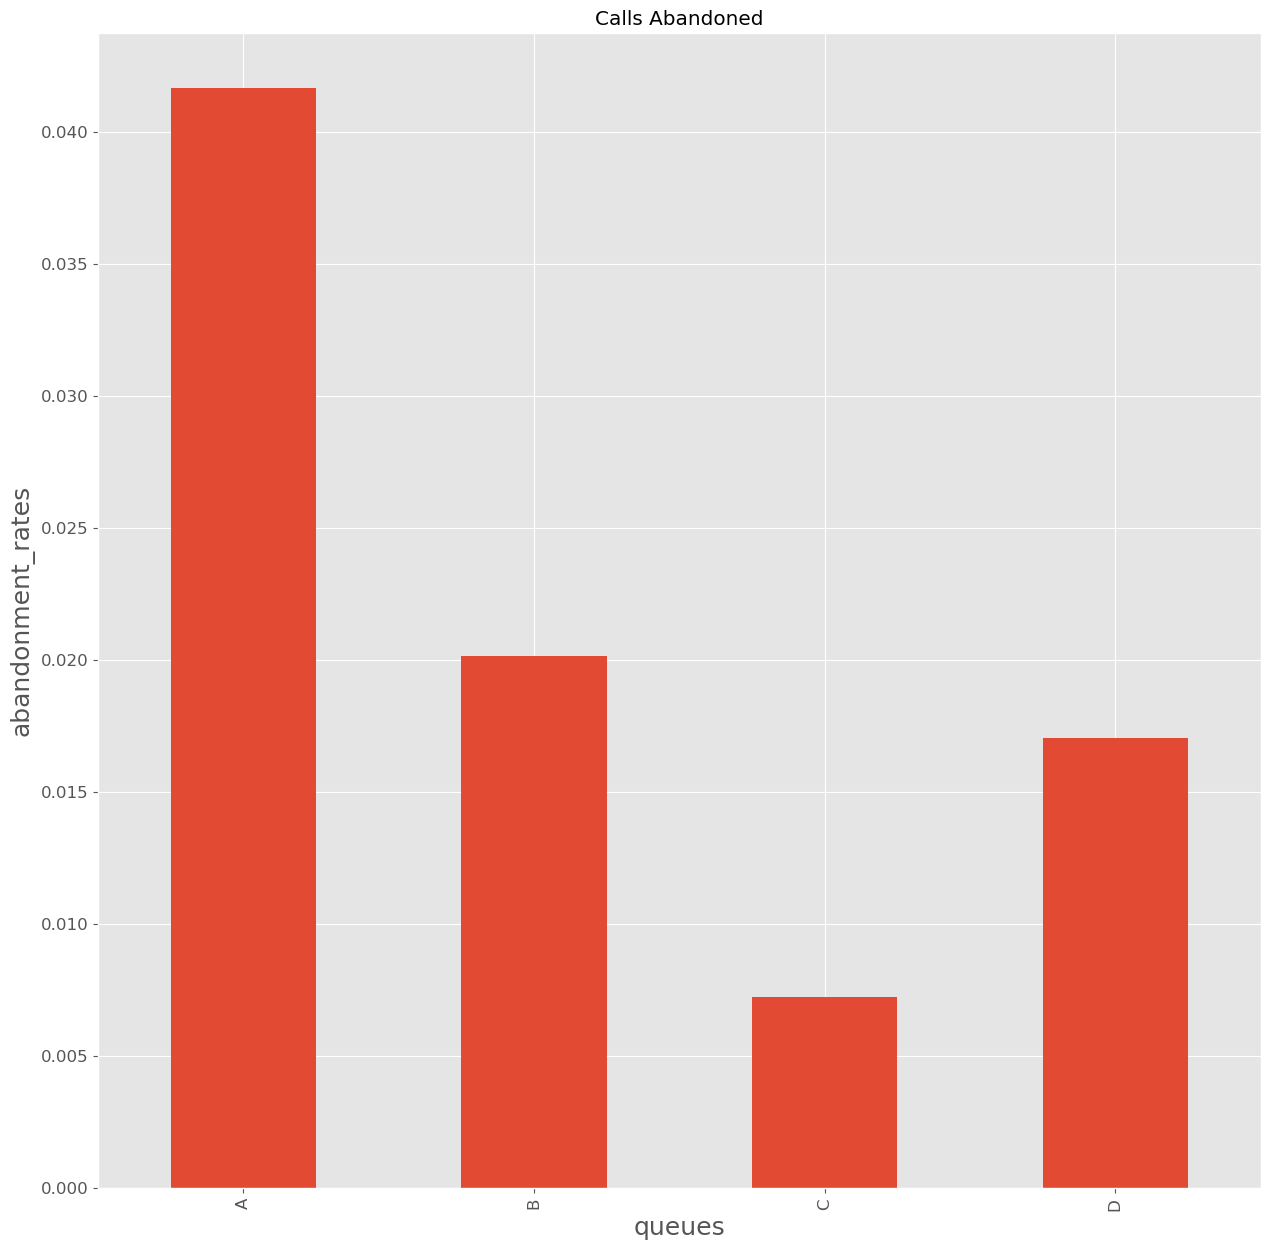

In [122]:
# Create visualization 1 here
# Import any additional libraries needed with alias
# The dictionary abandonment_rates has the data you need.     
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
df = [north_df, south_df]
nsdf = pd.concat(df)
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = nsdf.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
#abandonment_rates
aratesdata = pd.DataFrame([abandonment_rates],index=[0]).T
#.T transpose
#Your Code Here:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
aratesdata.plot.bar(title ="Calls Abandoned",figsize=(15,15),legend=False, fontsize=12,)
plt.xlabel("queues",fontsize=18)
plt.ylabel("abandonment_rates",fontsize=18)
plt.show()


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

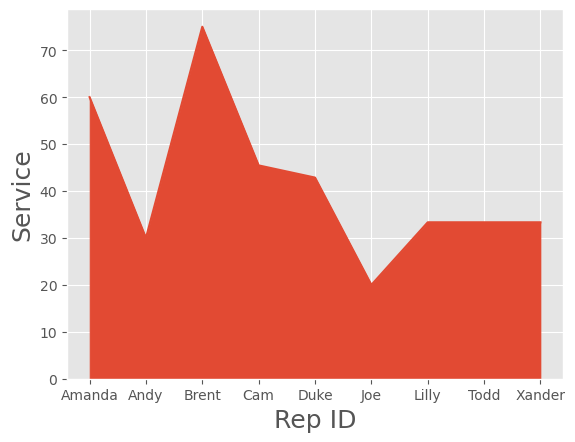

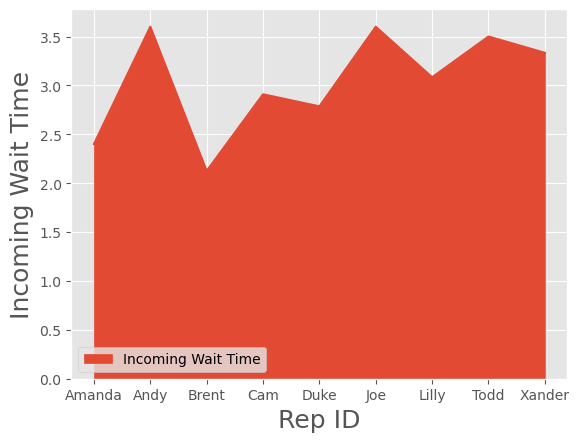

In [130]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
north = pd.read_csv("NorthCallCenter.csv")


north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
#What is the service level percentage?
#Your Code Here:

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

service_level["Service Level %"].plot.area(x='Rep ID',y='Service', rot=0)
plt.xlabel("Rep ID",fontsize=18)
plt.ylabel("Service",fontsize=18)
plt.show()

north_plt.plot.area(x='Rep ID',y='Incoming Wait Time', rot=0)
plt.xlabel("Rep ID",fontsize=18)
plt.ylabel("Incoming Wait Time",fontsize=18)
plt.show()


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


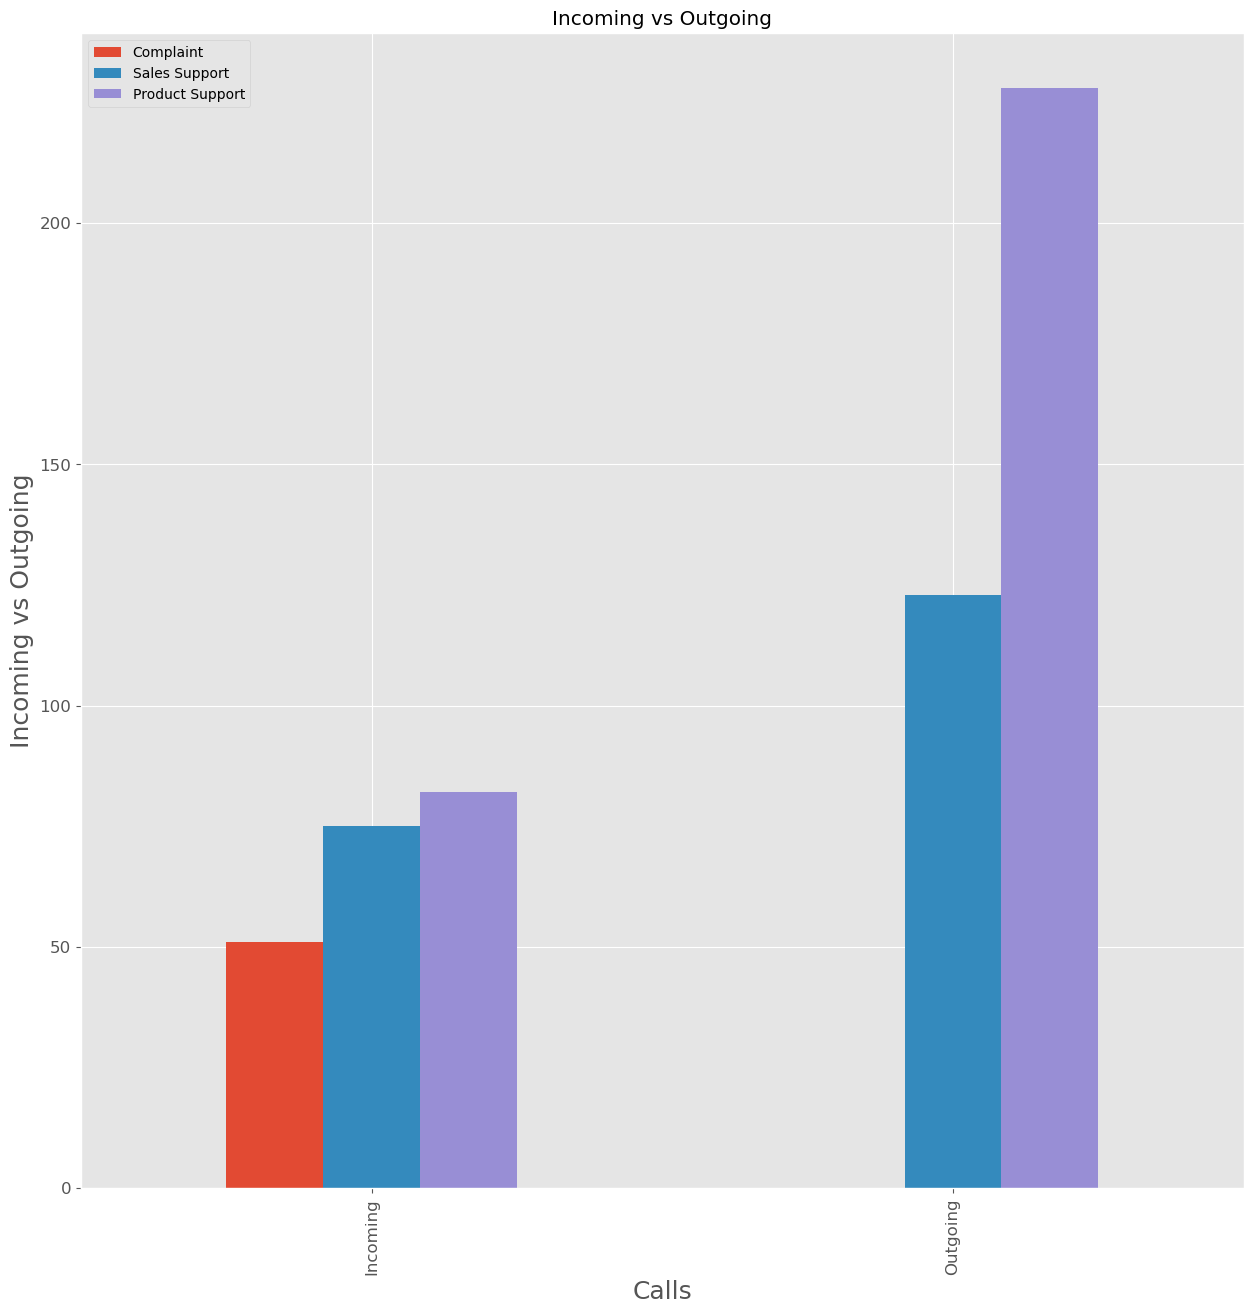

In [107]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
df = [north_df, south_df]
nsdf = pd.concat(df)

purpose_group = nsdf.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
aratesdata = pd.DataFrame([complaints, sales_support, product_support],index=["Complaint", "Sales Support","Product Support"]).T
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
aratesdata.plot.bar(title ="Incoming vs Outgoing",figsize=(15,15),legend=True, fontsize=12,)
plt.xlabel("Calls",fontsize=18)
plt.ylabel("Incoming vs Outgoing",fontsize=18)
plt.show()


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: South branch is marginally more efficient on abandonment rate and average speed of answer but south also has two additional reps meaning that North likely is more efficient as their numbers would decrease with more staff to take calls. 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
The North branch would benifit from the most help as their call stats are lower than the souths. However they are currently close in stats. My suggestion would be 3 at North and 2 at South. I also think that while their is a field for product support/ complaint/ sales support reviewing those indiviual fields more closely to see if improvements can be made to trainings or a frequent complaint to elimiate the need for more incoming calls. 

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: As mentioned the data provided shows both branchs are meeting thier requirements south has minorly better numbers but that is offset by having an additional team members which if North had would likely put North in with more efficient results. However instead of adding staff I would want to understand the root cause for the calls received outside of vague statements like product support. Which product? is it the same feature that is not understood? could you improve the feature or create how to videos to lesson the calls received. For complaints is it the same product/staff can something be done to not need the calls. 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

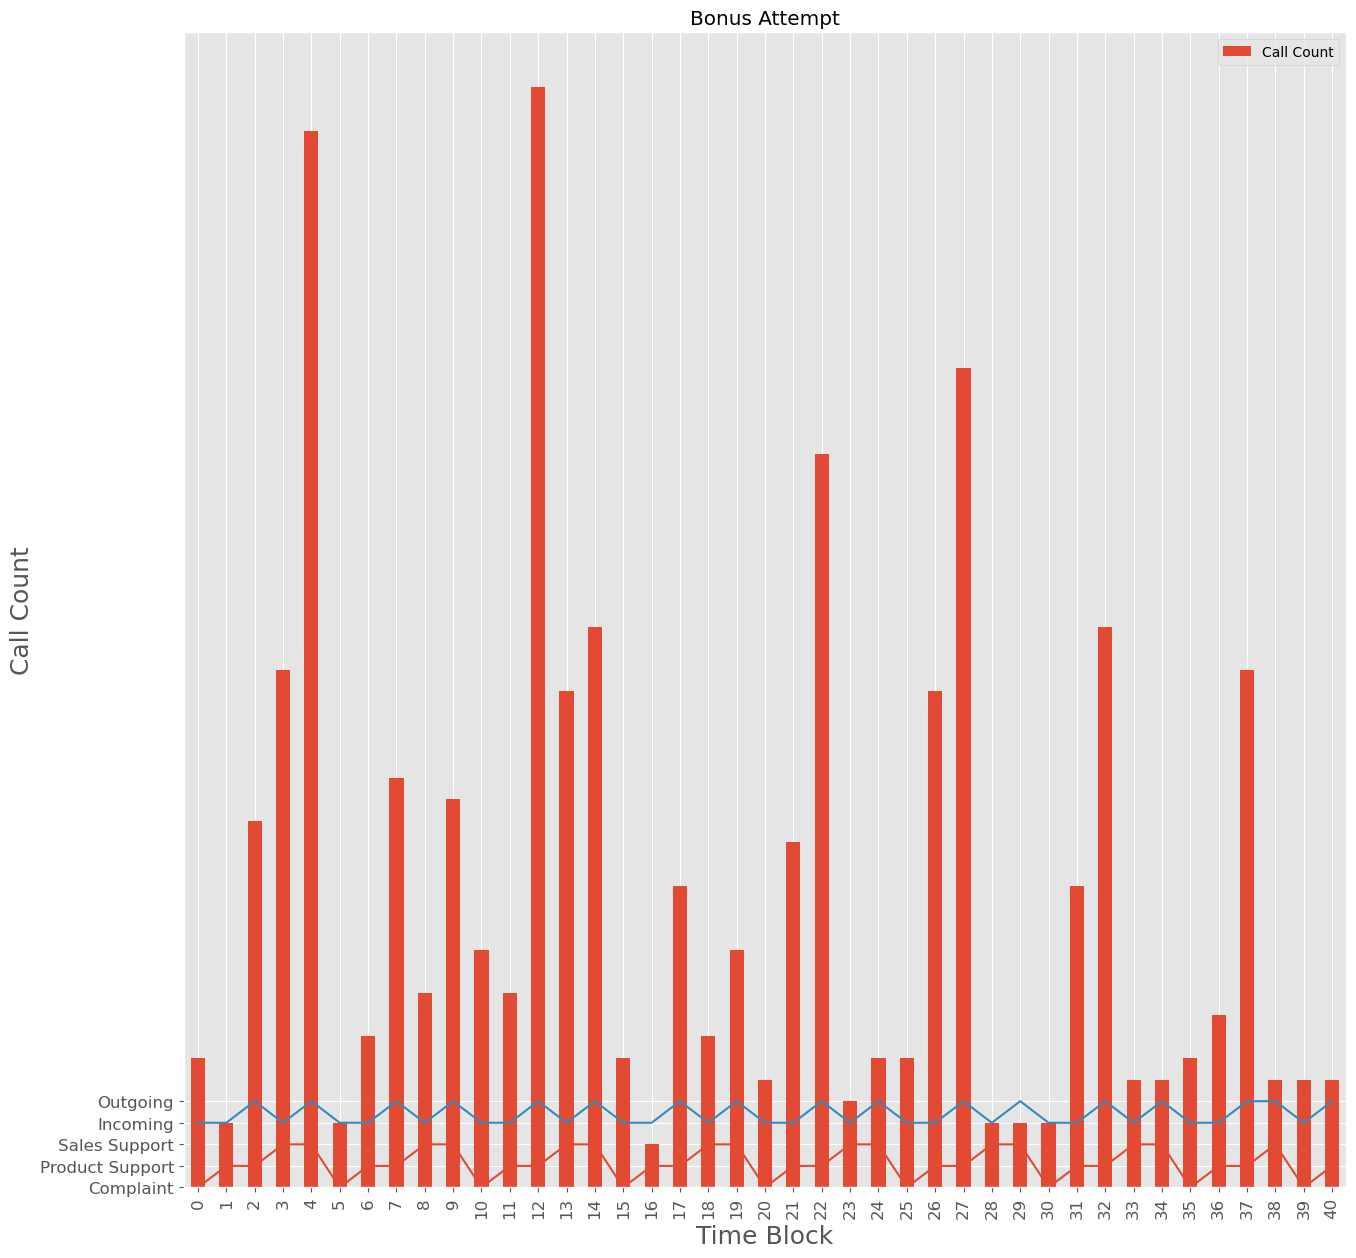

In [119]:
#For each call purpose, 
#how many calls (incoming and outgoing) take place in each time block?
#Given:call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
# Use groupby to plot based on time blocks:
# Use groupby and get_group to select which call purpose to plot:
#megan plans
#Table showing Call Purpose, Incoming or Outgoing, Calls, Timeblock
#Need Groupby Time Block
    #Sum of calls by Call Purpose and Incoming vs Out going
import pandas as pd
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
df_northccb = north_df[['Calls', 'Time Block','Incoming or Outgoing','Call Purpose']]
df_southccb = south_df[['Calls', 'Time Block','Incoming or Outgoing','Call Purpose']]
concat_nsdf = pd.concat([df_northccb,df_southccb])
concat_nsdf['Calls'].astype('int')
grouped = concat_nsdf.groupby(['Time Block','Call Purpose','Incoming or Outgoing'])['Calls'].count().reset_index(name="Call Count")
grouped


#Your Code Here:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
grouped.plot.bar(title ="Bonus Attempt",figsize=(15,15),legend=True, fontsize=12,)
plt.xlabel("Time Block",fontsize=18)
plt.ylabel("Call Count",fontsize=18)
plt.plot(grouped['Call Purpose'])
plt.plot(grouped['Incoming or Outgoing'])
plt.show()
